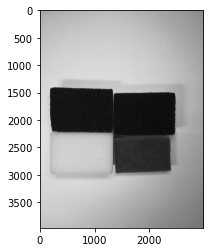

In [1]:
#ez az eredeti, nem olyan szép reshapes megoldásom

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

DATADIR = "E:/Egyetem/5_felev/Temalab/jupyk/HF_classification_szivacs"
CATEGORIES = ['phase_1','phase_2','phase_3','phase_4']


for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #maradjon színes, ne állítsuk greyscale-re
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
print(img_array)

[[168 167 165 ... 135 132 131]
 [168 167 167 ... 133 130 129]
 [167 168 168 ... 132 131 132]
 ...
 [167 168 167 ... 112 113 114]
 [166 167 167 ... 115 118 119]
 [165 166 167 ... 118 120 121]]


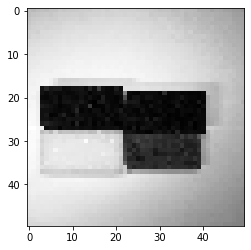

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [4]:
new_array.shape

(50, 50)

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #maradjon színes, ne állítsuk greyscale-re
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exeption as e:
                pass
            
create_training_data()

In [6]:
print(len(training_data))

489


In [7]:
#h ne sorszám alapján gondolkodjon
import random

random.shuffle(training_data)

In [8]:
target = [] #---> 0,1,2,3
data = [] #---->array
for features, label in training_data:
    data.append(features)
    target.append(label)

print(data[1])

[[183 183 184 ... 144 145 141]
 [187 189 191 ... 148 147 143]
 [191 193 195 ... 152 149 146]
 ...
 [214 214 214 ... 138 135 133]
 [213 213 213 ... 135 133 129]
 [209 211 211 ... 132 127 130]]


In [14]:
#print(data[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
data = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
data[0]

array([[[113],
        [115],
        [117],
        ...,
        [121],
        [119],
        [113]],

       [[114],
        [114],
        [125],
        ...,
        [127],
        [130],
        [124]],

       [[122],
        [119],
        [123],
        ...,
        [131],
        [127],
        [123]],

       ...,

       [[150],
        [158],
        [154],
        ...,
        [113],
        [110],
        [106]],

       [[145],
        [155],
        [153],
        ...,
        [110],
        [108],
        [107]],

       [[148],
        [152],
        [148],
        ...,
        [108],
        [106],
        [106]]], dtype=uint8)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size=0.3)

In [16]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))

342
342
147


In [17]:
nsamples = 342
n = 50
#nsamples, n, n = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,n*n))

model.fit(d2_train_dataset,Y_train)

RandomForestClassifier()

In [18]:
d2_test_dataset = X_test.reshape((147,n*n))
model.score(d2_test_dataset, Y_test)

0.9863945578231292

In [19]:
Y_predicted = model.predict(d2_test_dataset)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
cm

array([[30,  0,  0,  0],
       [ 1, 49,  1,  0],
       [ 0,  0, 40,  0],
       [ 0,  0,  0, 26]], dtype=int64)

Text(69.0, 0.5, 'Truth')

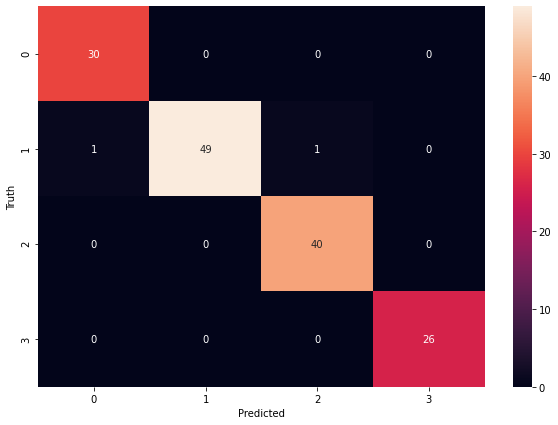

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')